In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import util
import numpy as np
import matplotlib.pyplot as plt

from p01_lr import logistic_regression

In [2]:
print('==== Training model on data set A ====')
Xa, Ya = util.load_csv('../data/ds1_a.csv', add_intercept=True)
logistic_regression(Xa, Ya)

==== Training model on data set A ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Converged in 30397 iterations


In [3]:
print('\n==== Training model on data set B ====')
Xb, Yb = util.load_csv('../data/ds1_b.csv', add_intercept=True)

# Warning: Running the following command will take forever to finish
# logistic_regression(Xb, Yb)


==== Training model on data set B ====


(a) 

Training the model on dataset A converges quickly, while training the model on dataset B never seems to converge.

(b)

First let's visualize the dataset A and B respectively:

It seems that the biggest difference is that the two classes in dataset B are linearly separable, while the two classes in dataset A are not linearly separable. 

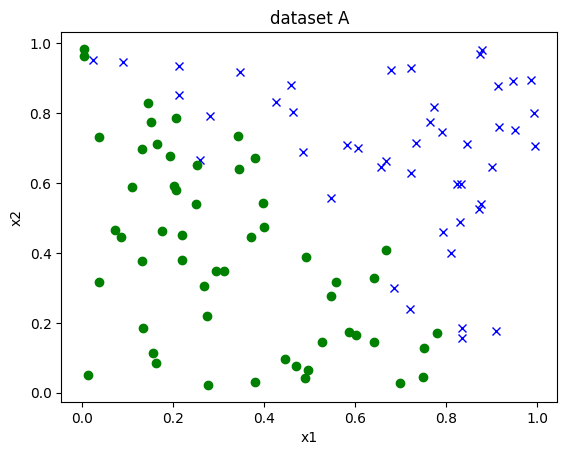

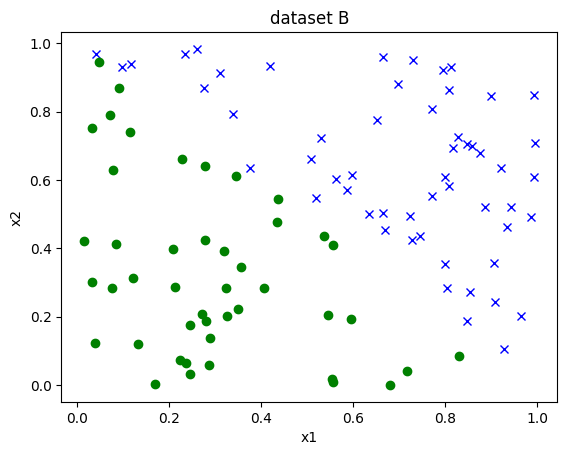

In [4]:
def plot_data(x,y,title = ''):
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == -1, -2], x[y == -1, -1], 'go', linewidth=2)
    plt.xlabel('x1')
    plt.ylabel('x2')
    if title != '':
        plt.title(title)

plot_data(Xa, Ya, title='dataset A')
plt.show()

plot_data(Xb, Yb, title='dataset B')
plt.show()

(After reading the solution)

When $y = 0, 1$, the loss for a single example is:

$$J^{(i)} = -[y^{(i)} \ln h_\theta(x^{(i)}) + (1-y^{(i)})\ln (1 - h_\theta(x^{(i)}))]$$

This means for a positive example, the loss is 

$$J_+^{(i)} = -\ln h_\theta(x^{(i)}) = \ln(1 + \exp(-\theta^T x^{(i)}))$$

for a negative example, the loss is

$$J_-^{(i)} =-\ln (1 - h_\theta(x^{(i)})) = \ln(1+\exp(\theta^T x^{(i)}))$$

If we use $y=1$ to label a positive example and $y=-1$ to label a negative example, then we have:

$$J^{(i)} = \ln(1 + \exp(-y^{(i)}\theta^T x^{(i)})) \;\;\;\; (y=1,-1)$$

So the total loss is

$$J =\sum_{i=1}^m \ln(1 + \exp(-y^{(i)}\theta^T x^{(i)})) \;\;\;\; (y=1,-1)$$

When the dataset is linearly separable, this means $y^{(i)}\theta^T x^{(i)} > 0$ for all data points. So we can always scale $\theta$ to decrease $J$ without changing the decision boundary. That's why the training of dataset B never seems to stop.

(c)

i. No. We can still scale the $\theta$ to decrease $J$.

ii. No. Same as above.

iii. No. Linear scaling of the input features does not change whether the dataset is linear separable or not.

iv. Yes. This prevents us from arbitrarily scaling $\theta$.

v. Yes. This may make the dataset linearly separable.

(d)

No. As long as we have a regularization term, we prevent the problem of scaling $\theta$ up to decrease $J$. So the hinge loss, which has a regularization effect, will help the training process converge.

(Below is my own investigation)

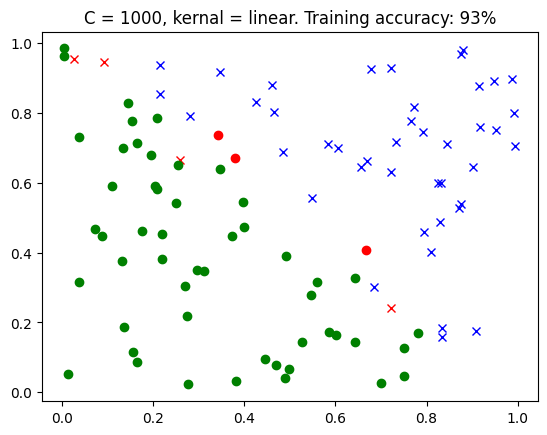

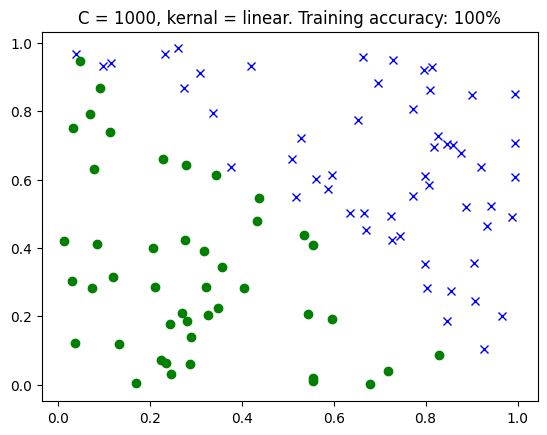

In [5]:
from sklearn import svm
from sklearn.metrics import accuracy_score

def train_with_svm(x, y, C=1, kernel='rbf'):
    clf = svm.SVC(C=C, kernel=kernel)
    clf.fit(x, y)
    y_pred = clf.predict(x)
    accurary = accuracy_score(y, y_pred)

    # Positive examples that are predicted correctly
    plt.plot(x[((y == 1) & (y_pred == 1)), -2], x[((y == 1) & (y_pred == 1)), -1], 'bx', linewidth=2)
    # Positive examples that are predicted incorrectly
    plt.plot(x[((y == 1) & (y_pred <= 0)), -2], x[((y == 1) & (y_pred <= 0)), -1], 'rx', linewidth=2)
    # Negative examples that are predicted correctly
    plt.plot(x[((y <= 0) & (y_pred <= 0)), -2], x[((y <= 0) & (y_pred <= 0)), -1], 'go', linewidth=2)
    # Negative examples that are predicted incorrectly
    plt.plot(x[((y <= 0) & (y_pred == 1)), -2], x[((y <= 0) & (y_pred == 1)), -1], 'ro', linewidth=2)
    plt.title(f"C = {C}, kernal = {kernel}. Training accuracy: {100 * accurary:.0f}%")
    plt.show()
    

accurary_a = train_with_svm(Xa, Ya, C=1000, kernel='linear')
accurary_b = train_with_svm(Xb, Yb, C=1000, kernel='linear')